In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

try:
  import google.colab
  IN_COLAB = True
  from google.colab.data_table import DataTable
  DataTable.max_columns = 102
except:
  IN_COLAB = False

# Data Cleaning

In [2]:
df = pd.read_csv("Harbor_Water_Quality.csv", low_memory=False)

In [3]:
df.head()

Sampling Location Duplicate Sample Sample Date Sample Time  \
0                K2              NaN  07/06/1965     9:50 AM   
1                N8              NaN  07/16/1909     4:10 PM   
2                N9              NaN  07/27/1972     9:22 AM   
3                E3              NaN  08/28/1968     9:45 AM   
4               N3A              NaN  08/14/1957    11:15 AM   

  Weather Condition (Dry or Wet)  Top Sample Temperature  \
0                            NaN                    22.8   
1                            NaN                    20.0   
2                            NaN                    17.2   
3                            NaN                    22.8   
4                            NaN                    23.3   

   Bottom Sample Temperature Site Actual Depth (ft)  Top Sample Depth(ft)  \
0                       22.2                     21                   NaN   
1                        NaN                    NaN                   1.0   
2                       16.1                    NaN                   NaN   
3                       22.2                    NaN                   NaN   
4                       22.8                     43                   NaN   

   Bottom Sample Depth (ft)  ...  \
0                       NaN  ...   
1                       NaN  ...   
2                       NaN  ...   
3                       NaN  ...   
4                       NaN  ...   

   Oakwood  Total Suspended Solid Top Sample  (mg/L)  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

   Oakwood Total Suspended Solid Bottom Sample (mg/L)  \
0                                                NaN    
1                                                NaN    
2                                                NaN    
3                                                NaN    
4                                                NaN    

  Top Turbidity( Nephelometric Turbidity Units)  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

  Bottom Turbidity YSI (Nephelometric Turbidity Units)  Sampling Comment  \
0                                                NaN                 NaN   
1                                                NaN                 NaN   
2                                                NaN                 NaN   
3                                                NaN                 NaN   
4                                                NaN                 NaN   

         Long        Lat       Type  Unnamed: 100  Unnamed: 101  
0     -74.153  40.641167  Permanent           NaN           NaN  
1    -74.0455  40.606167  Permanent           NaN           NaN  
2  -73.983333  40.568333  Permanent           NaN           NaN  
3  -73.966112  40.747499  Permanent           NaN           NaN  
4  -73.992497   40.78333  Permanent           NaN           NaN  

[5 rows x 102 columns]

In [4]:
# Drop duplicate samples
df["Duplicate Sample"] = df["Duplicate Sample"].replace(np.NaN, False)
df["Duplicate Sample"] = df["Duplicate Sample"].replace('D', True)
df = df.drop(list(df[(df["Duplicate Sample"] == True)].index))

In [5]:
# Collect basic water quality metrics
df = pd.DataFrame({
    "Sampling Location": df["Sampling Location"],
    "Sample Date": df["Sample Date"],
    "Season": np.NaN, # Integers Winter = 1, Spring = 2 ... 
    "Top Sample Temperature": df["Top Sample Temperature"],
    "Bottom Sample Temperature": df["Bottom Sample Temperature"],
    "Top Salinity": df["Top Salinity(psu)"],
    "Bottom Salinity": df["Bottom Salinity(psu)"],
    "Top PH": df["Top PH"],
    "Bottom PH": df["Bottom PH"],
    "Long": df["Long"],
    "Lat": df["Lat"],
})

In [6]:
df.head()

Sampling Location Sample Date  Season  Top Sample Temperature  \
0                K2  07/06/1965     NaN                    22.8   
1                N8  07/16/1909     NaN                    20.0   
2                N9  07/27/1972     NaN                    17.2   
3                E3  08/28/1968     NaN                    22.8   
4               N3A  08/14/1957     NaN                    23.3   

   Bottom Sample Temperature  Top Salinity  Bottom Salinity Top PH  Bottom PH  \
0                       22.2         28.70             28.7    NaN        NaN   
1                        NaN           NaN              NaN    NaN        NaN   
2                       16.1         31.10             31.4    NaN        NaN   
3                       22.2         27.60             27.6    NaN        NaN   
4                       22.8         22.05             25.2    NaN        NaN   

         Long        Lat  
0     -74.153  40.641167  
1    -74.0455  40.606167  
2  -73.983333  40.568333  
3  -73.966112  40.747499  
4  -73.992497   40.78333

In [7]:
def filter_floats(value):
  # Some numeric data points are corrupted, lets remove them.
  try:
    return float(value)
  except ValueError:
    return np.NaN

In [8]:
df["Top PH"] = df["Top PH"].apply(lambda value: filter_floats(value))
df["Bottom PH"] = df["Bottom PH"].apply(lambda value: filter_floats(value))
df["Top Sample Temperature"] = df["Top Sample Temperature"].apply(lambda value: filter_floats(value))
df["Bottom Sample Temperature"] = df["Bottom Sample Temperature"].apply(lambda value: filter_floats(value))
df["Top Salinity"] = df["Top Salinity"].apply(lambda value: filter_floats(value))
df["Bottom Salinity"] = df["Bottom Salinity"].apply(lambda value: filter_floats(value))
df["Long"] = df["Long"].apply(lambda value: filter_floats(value))
df["Lat"] = df["Lat"].apply(lambda value: filter_floats(value))

In [9]:
df["Sample Date"] = df["Sample Date"].apply(lambda date: pd.to_datetime(date))

# Adding Features

In [10]:
def season(date):
    if date.month == 12 or 1 <= date.month <= 2:
        return 1 # "Winter"
    if 3 <= date.month <= 5:
        return 2 # "Spring"
    if 6 <= date.month <= 8:
        return 3 # "Summer"
    if 9 <= date.month < 12:
        return 4 # "Fall"

In [11]:
df["Season"] = [season(date) for date in df["Sample Date"]]

In [12]:
df = df.sort_values("Sample Date")

In [13]:
df.head()

Sampling Location Sample Date  Season  Top Sample Temperature  \
15125           x4_1909  1909-03-23       2                     NaN   
29053           x5_1909  1909-03-23       2                     3.0   
34749           x8_1909  1909-03-23       2                     NaN   
32820           x7_1909  1909-03-23       2                     3.0   
17114           x6_1909  1909-03-23       2                     NaN   

       Bottom Sample Temperature  Top Salinity  Bottom Salinity  Top PH  \
15125                        3.0           NaN              NaN     NaN   
29053                        NaN           NaN              NaN     NaN   
34749                        3.2           NaN              NaN     NaN   
32820                        NaN           NaN              NaN     NaN   
17114                        3.4           NaN              NaN     NaN   

       Bottom PH       Long        Lat  
15125        NaN -74.072222  40.651111  
29053        NaN -74.077222  40.651111  
34749        NaN -74.063611  40.634167  
32820        NaN -74.063611  40.634167  
17114        NaN -74.077222  40.651111

# Exploration & Sampling

In [14]:
wq_data = df[["Sample Date", "Bottom PH", "Bottom Sample Temperature", "Bottom Salinity"]]

In [15]:
univariate_ph = wq_data[["Sample Date", "Bottom PH"]].dropna().sort_values(by="Sample Date")
univariate_ph.head()

Sample Date  Bottom PH
5315   1986-06-23        7.8
47385  1986-06-23        7.3
30190  1986-06-23        7.5
17572  1986-06-23        8.0
19308  1986-06-23        7.3

In [16]:
univariate_ph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32865 entries, 5315 to 27168
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Sample Date  32865 non-null  datetime64[ns]
 1   Bottom PH    32865 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 770.3 KB


In [17]:
ten_year_avg = wq_data[["Sample Date", "Bottom PH"]].dropna().sort_values(by="Sample Date")
ten_year_avg[(ten_year_avg["Sample Date"] > "2012-1-1")]["Bottom PH"].mean()

7.675347584987544

Text(0, 0.5, 'pH')

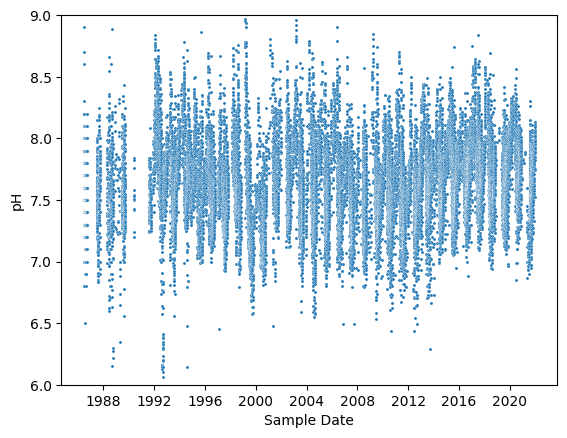

In [18]:
fig, ax = plt.subplots()
sns.scatterplot(data=univariate_ph, x="Sample Date", y="Bottom PH", s=5)
plt.ylim(6, 9)
plt.ylabel("pH")

In [19]:
seasons = df[["Sample Date", "Season", "Bottom PH"]].dropna().sort_values(by="Sample Date")
seasons["Sample Date"] = seasons["Sample Date"].apply(lambda date: pd.to_datetime(date))
seasons["Sample Date"] = seasons["Sample Date"].apply(lambda date: date.year)

In [20]:
winter = seasons[(seasons["Season"] == 1)]
spring = seasons[(seasons["Season"] == 2)]
summer = seasons[(seasons["Season"] == 3)]
fall = seasons[(seasons["Season"] == 4)]

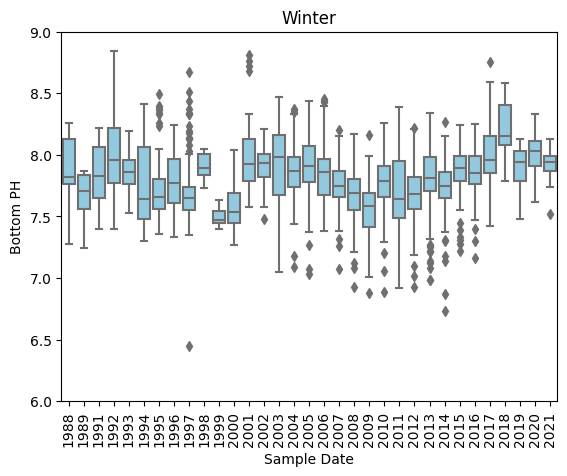

In [21]:
fig, ax = plt.subplots()
sns.boxplot(data=winter, x="Sample Date", y="Bottom PH", color='skyblue')
plt.title("Winter")
plt.ylim(6, 9)
plt.xticks(rotation=90);

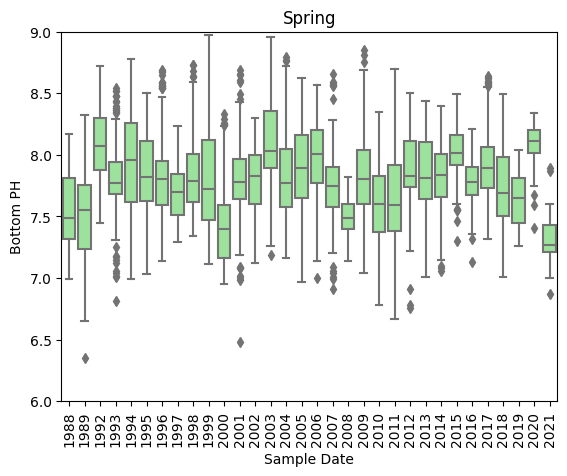

In [22]:
fig, ax = plt.subplots()
sns.boxplot(data=spring, x="Sample Date", y="Bottom PH", color='lightgreen')
plt.title("Spring")
plt.ylim(6, 9)
plt.xticks(rotation=90);

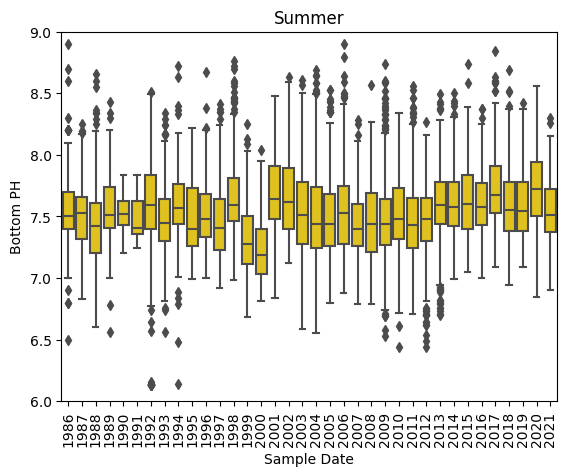

In [23]:
fig, ax = plt.subplots()
sns.boxplot(data=summer, x="Sample Date", y="Bottom PH", color='gold')
plt.title("Summer")
plt.ylim(6, 9)
plt.xticks(rotation=90);

In [24]:
reproduction_seasons = pd.concat([spring, summer])
reproduction_seasons[(reproduction_seasons["Sample Date"] > 2010)]["Bottom PH"].mean()

7.641083101089435

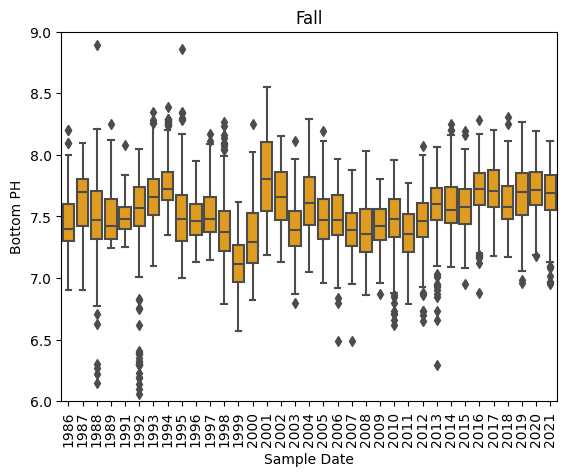

In [25]:
fig, ax = plt.subplots()
sns.boxplot(data=fall, x="Sample Date", y="Bottom PH", color='orange')
plt.title("Fall")
plt.ylim(6, 9)
plt.xticks(rotation=90);

# Time Series Forecasting with Prophet

In [26]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

Text(0, 0.5, 'pH')

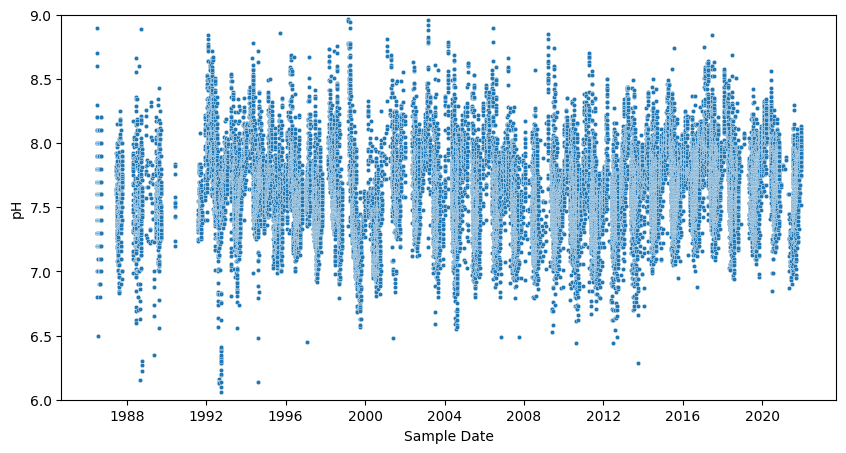

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=univariate_ph, x="Sample Date", y="Bottom PH", s=10)
plt.ylim(6, 9)
plt.ylabel("pH")

In [28]:
univariate_ph = univariate_ph.rename(
    columns={
        "Sample Date": "ds",
        "Bottom PH": "y"
    }
)

In [29]:
# Group all sample dates to their median pH
univariate_ph = univariate_ph.groupby(['ds'], as_index=False).median()

In [30]:
univariate_ph

ds      y
0    1986-06-23  7.500
1    1986-06-24  7.500
2    1986-06-25  7.450
3    1986-06-26  7.900
4    1986-06-30  7.700
...         ...    ...
2588 2021-11-16  7.910
2589 2021-12-06  7.920
2590 2021-12-07  7.950
2591 2021-12-08  7.985
2592 2021-12-13  7.520

[2593 rows x 2 columns]

Text(0, 0.5, 'pH')

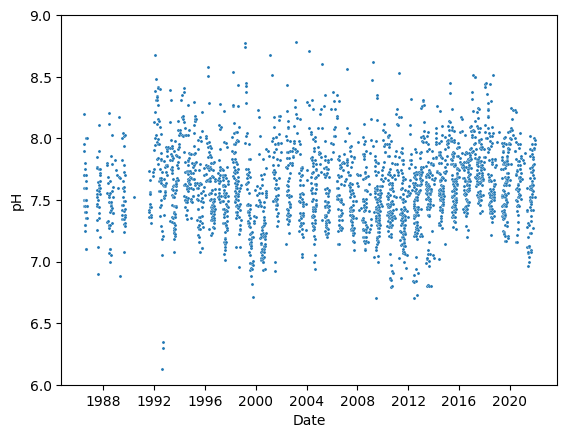

In [31]:
sns.scatterplot(data=univariate_ph, x="ds", y="y", s=5)
plt.ylim(6, 9)
plt.xlabel("Date")
plt.ylabel("pH")

In [32]:
split = '2021-12-13'

In [33]:
ph_train = univariate_ph[(univariate_ph["ds"] <= split)]
ph_test = univariate_ph[(univariate_ph["ds"] >= split)]

In [34]:
model = Prophet()

In [35]:
model.fit(ph_train)

10:01:51 - cmdstanpy - INFO - Chain [1] start processing
10:01:52 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
forecast_horizon = 3650

In [37]:
future = model.make_future_dataframe(periods=forecast_horizon)
future.tail()

ds
6238 2031-12-07
6239 2031-12-08
6240 2031-12-09
6241 2031-12-10
6242 2031-12-11

In [38]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
6238 2031-12-07  8.088098    7.592126    8.606059
6239 2031-12-08  7.576481    7.080933    8.081903
6240 2031-12-09  7.705578    7.178418    8.194886
6241 2031-12-10  7.651500    7.150633    8.168995
6242 2031-12-11  7.596203    7.102821    8.099540

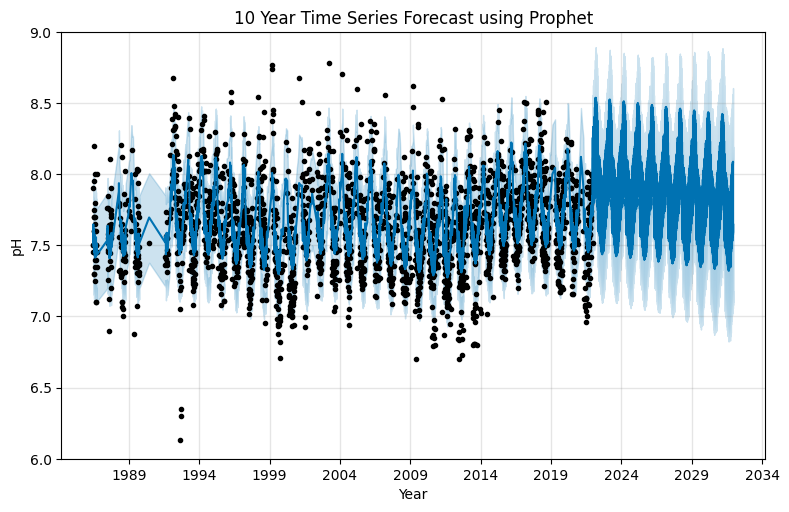

In [39]:
fig, ax = plt.subplots(figsize=(8, 5))
fig = model.plot(forecast, ax=ax)
plt.ylim(6, 9)
plt.xlabel("Year")
plt.ylabel("pH")
ax.set_title('10 Year Time Series Forecast using Prophet')
plt.show()

In [40]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

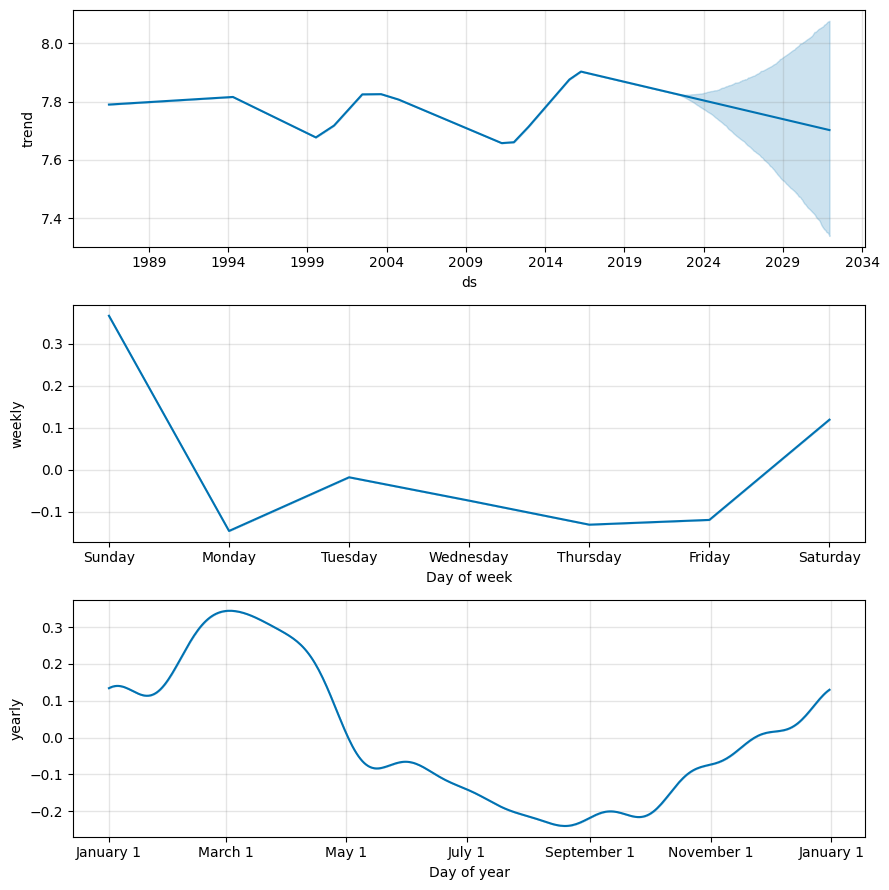

In [41]:
fig2 = model.plot_components(forecast)

## Evaluation

Information on how evaluation works: https://facebook.github.io/prophet/docs/diagnostics.html

In [42]:
import matplotlib.patches as mpatches

/tmp/ipykernel_58751/23441182.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



Text(0.5, 1.0, '10 Year Forecast Vs. Actual Samples of New York Harbor')

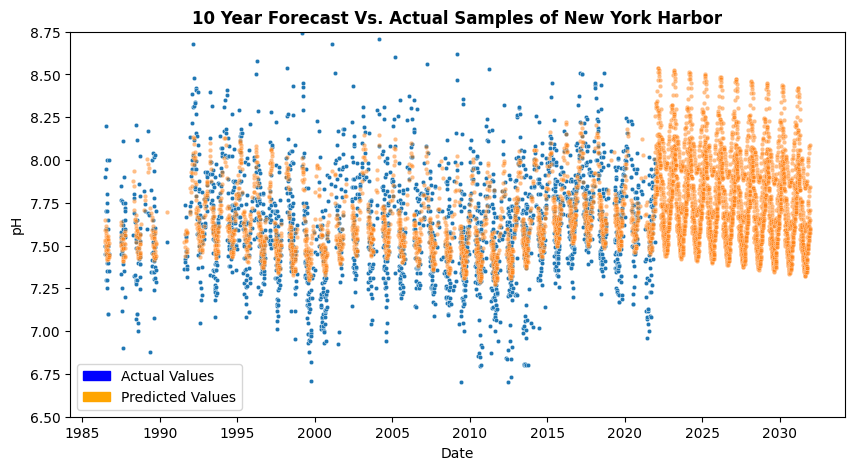

In [43]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=univariate_ph, x="ds", y="y", s=10)
sns.scatterplot(data=forecast, x="ds", y="yhat", palette="deep", alpha=0.5, s=10)

real_patch = mpatches.Patch(color='blue', label='Actual Values')
pred_patch = mpatches.Patch(color='orange', label='Predicted Values')
plt.legend(handles=[real_patch, pred_patch])

plt.ylim(6.5, 8.75)
plt.xlabel("Date")
plt.ylabel("pH")
plt.title("10 Year Forecast Vs. Actual Samples of New York Harbor", fontweight="bold")

/tmp/ipykernel_58751/3541162823.py:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



Text(0.5, 1.0, '2017-2028 Forecast vs. Actual Values')

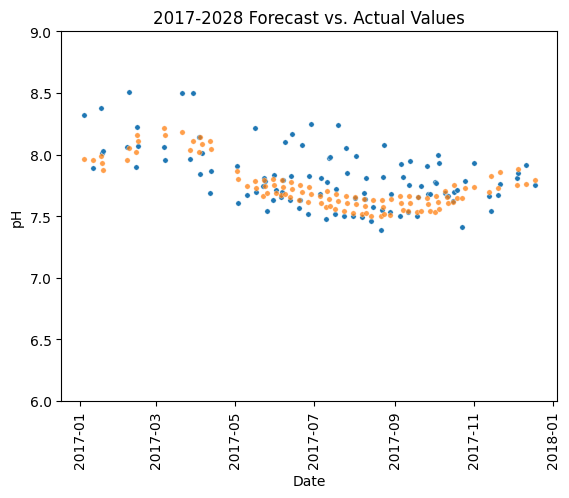

In [44]:
univariate_ph_focus = univariate_ph[(univariate_ph["ds"] >= '2017-1-1') & (univariate_ph["ds"] <= '2018-1-1')]
forecast_focus = forecast[(forecast["ds"] >= '2017-1-1') & (forecast["ds"] <= '2018-1-1')]
sns.scatterplot(data=univariate_ph_focus, x="ds", y="y", s=15)
sns.scatterplot(data=forecast_focus, x="ds", y="yhat", palette="deep", alpha=0.75, s=15)
plt.ylim(6, 9)
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("pH")
plt.title('2017-2028 Forecast vs. Actual Values')

In [45]:
from prophet.diagnostics import performance_metrics

In [46]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='3650 days')
# df_cv = cross_validation(model, initial='730 days', period='120 days', horizon='120 days')

  0%|          | 0/48 [00:00<?, ?it/s]

10:01:55 - cmdstanpy - INFO - Chain [1] start processing
10:01:55 - cmdstanpy - INFO - Chain [1] done processing
10:01:55 - cmdstanpy - INFO - Chain [1] start processing
10:01:55 - cmdstanpy - INFO - Chain [1] done processing
10:01:55 - cmdstanpy - INFO - Chain [1] start processing
10:01:55 - cmdstanpy - INFO - Chain [1] done processing
10:01:56 - cmdstanpy - INFO - Chain [1] start processing
10:01:56 - cmdstanpy - INFO - Chain [1] done processing
10:01:56 - cmdstanpy - INFO - Chain [1] start processing
10:01:56 - cmdstanpy - INFO - Chain [1] done processing
10:01:56 - cmdstanpy - INFO - Chain [1] start processing
10:01:56 - cmdstanpy - INFO - Chain [1] done processing
10:01:56 - cmdstanpy - INFO - Chain [1] start processing
10:01:56 - cmdstanpy - INFO - Chain [1] done processing
10:01:57 - cmdstanpy - INFO - Chain [1] start processing
10:01:57 - cmdstanpy - INFO - Chain [1] done processing
10:01:57 - cmdstanpy - INFO - Chain [1] start processing
10:01:57 - cmdstanpy - INFO - Chain [1]

In [47]:
df_cv

ds       yhat  yhat_lower  yhat_upper      y     cutoff
0     1988-12-15   5.197079    4.896573    5.491080  7.820 1988-10-17
1     1989-01-09  13.262333   12.957822   13.542701  7.745 1988-10-17
2     1989-01-23   9.871357    9.582960   10.131000  7.705 1988-10-17
3     1989-03-09   5.639387    5.344702    5.931092  7.600 1988-10-17
4     1989-03-23 -12.477050  -12.744801  -12.187676  8.170 1988-10-17
...          ...        ...         ...         ...    ...        ...
37442 2021-11-16   7.332946    6.817903    7.843973  7.910 2011-12-16
37443 2021-12-06   7.200826    6.728469    7.695612  7.920 2011-12-16
37444 2021-12-07   7.371934    6.886726    7.880251  7.950 2011-12-16
37445 2021-12-08   7.287188    6.780435    7.768159  7.985 2011-12-16
37446 2021-12-13   7.255437    6.750989    7.781510  7.520 2011-12-16

[37447 rows x 6 columns]

In [48]:
df_cv.to_csv("error-metrics.csv")

In [49]:
df_p = performance_metrics(df_cv)

In [50]:
df_p = performance_metrics(df_cv)
df_p

horizon       mse      rmse       mae      mape     mdape     smape  \
0     414 days  1.998931  1.413836  0.355589  0.046597  0.026182  0.045435   
1     415 days  1.999037  1.413873  0.355644  0.046603  0.026182  0.045442   
2     416 days  2.097627  1.448319  0.361045  0.047300  0.026231  0.046013   
3     417 days  2.189040  1.479540  0.366187  0.047950  0.026261  0.046574   
4     418 days  2.189039  1.479540  0.366130  0.047943  0.026255  0.046566   
...        ...       ...       ...       ...       ...       ...       ...   
3232 3646 days  2.695164  1.641695  0.755555  0.099200  0.068188  0.102238   
3233 3647 days  2.580018  1.606243  0.751320  0.098641  0.068317  0.101915   
3234 3648 days  2.377525  1.541923  0.742712  0.097506  0.068169  0.101141   
3235 3649 days  2.313285  1.520949  0.740008  0.097150  0.068169  0.100898   
3236 3650 days  2.314409  1.521318  0.740709  0.097237  0.068188  0.100993   

      coverage  
0     0.742254  
1     0.741987  
2     0.740808  
3     0.739957  
4     0.739917  
...        ...  
3232  0.453125  
3233  0.452991  
3234  0.454121  
3235  0.454238  
3236  0.453217  

[3237 rows x 8 columns]

In [51]:
df_p[(df_p["horizon"] < "1826 days")]

horizon       mse      rmse       mae      mape     mdape     smape  \
0     414 days  1.998931  1.413836  0.355589  0.046597  0.026182  0.045435   
1     415 days  1.999037  1.413873  0.355644  0.046603  0.026182  0.045442   
2     416 days  2.097627  1.448319  0.361045  0.047300  0.026231  0.046013   
3     417 days  2.189040  1.479540  0.366187  0.047950  0.026261  0.046574   
4     418 days  2.189039  1.479540  0.366130  0.047943  0.026255  0.046566   
...        ...       ...       ...       ...       ...       ...       ...   
1407 1821 days  3.226442  1.796230  0.580160  0.075973  0.041013  0.077128   
1408 1822 days  3.229714  1.797141  0.581264  0.076115  0.041058  0.077301   
1409 1823 days  3.230259  1.797292  0.581797  0.076184  0.041083  0.077370   
1410 1824 days  3.230594  1.797385  0.582066  0.076225  0.041083  0.077406   
1411 1825 days  3.229916  1.797197  0.581834  0.076193  0.041083  0.077368   

      coverage  
0     0.742254  
1     0.741987  
2     0.740808  
3     0.739957  
4     0.739917  
...        ...  
1407  0.564200  
1408  0.562856  
1409  0.562411  
1410  0.562233  
1411  0.561832  

[1412 rows x 8 columns]

Relevant metrics for forecasting models are:

  **MSE**: The mean squared error (MSE) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. MSE is a risk function, corresponding to the expected value of the squared error loss. The fact that MSE is almost always strictly positive (and not zero) is because of randomness or because the estimator does not account for information that could produce a more accurate estimate.

  **RMSE**: The root-mean-squared error is the square root of the average squared difference between the target and predicted values. RMSE is more sensitive to outliers than MAE,so if you're concerned about large errors, then RMSE can be a more useful metric to evaluate. Similar to MAE, a smaller value indicates a higher quality model (0 represents a perfect predictor).

  **MAE**: The mean absolute error (MAE) is the average absolute difference between the target values and the predicted values. This metric ranges from zero to infinity; a lower value indicates a higher quality model.

  **MAPE**: Mean absolute percentage error (MAPE) is the average absolute percentage difference between the labels and the predicted values. This metric ranges between zero and infinity; a lower value indicates a higher quality model.
  MAPE is not shown if the target column contains any 0 values. In this case, MAPE is undefined.
  
### Cross Validation

In our cross validation model we initally start our training with 2 years of training data, set our cutoff point and forecast recursivly for the next 10 years (until 10 year forecasts can NOT be made from a set cutoff point because there is no data to compare to). Per forecast cycle we then set our cutoff point to the next 6 months from the prior cutoff point (180 days) and continue the cycle.

# GeoSpatial Visualization

This dataset contains all measurements with coordinate values. This dataset ranges from 1986-2021

A few years contain missing data:

2000-2004

2014-2015


In [52]:
import plotly.express as px
import plotly.graph_objects as go

In [53]:
geo_default = df[["Sample Date", "Bottom PH", "Long", "Lat"]].dropna()

Some Longditude and Latitude Values are swapped.

In [54]:
idx = (df['Lat'] < 40)

# This should catch the majority of cases of where the lat and long are swapped.
geo_default.loc[idx,['Long','Lat']] = geo_default.loc[idx,['Lat','Long']].values
geo_default

Sample Date  Bottom PH       Long        Lat
5315   1986-06-23       7.80 -73.783667  40.800500
4280   1986-06-23       7.30 -73.922000  40.782500
3412   1986-06-23       7.70 -73.777221  40.832226
35646  1986-06-23       7.40 -73.860833  40.785500
17177  1986-06-23       7.60 -73.820500  40.805000
...           ...        ...        ...        ...
89092  2021-12-08       8.03 -73.931760  40.581720
86247  2021-12-08       8.11 -73.935100  40.567840
65979  2021-12-08       7.91 -73.806620  40.633120
57162  2021-12-08       7.88 -73.823000  40.650740
86025  2021-12-08       7.89 -73.822800  40.659740

[23674 rows x 4 columns]

## Visual

In [55]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [56]:
def f(year):
    import warnings
    warnings.filterwarnings('ignore')
    
    geo_year_select = geo_default[(geo_default["Sample Date"] >= f'{year}-1-1') & (geo_default["Sample Date"] <= f'{year+1}-1-1')]
    # Random coordinate variability for Sites to see all samples on map
    variability = 0.005
    geo_year_select["Long"] = geo_year_select["Long"].apply(lambda long: long + np.random.uniform(0, variability));
    geo_year_select["Lat"] = geo_year_select["Lat"].apply(lambda long: long + np.random.uniform(0, variability));
    
    fig = px.scatter_mapbox(geo_year_select, 
                            lat="Lat", 
                            lon="Long",
                            color="Bottom PH",
                            range_color=[5.5,9],
                            color_continuous_scale=px.colors.sequential.Hot,
                            zoom=9, 
                            center={"lat": 40.6928, "lon": -74.0120}
                            )
    fig.update_layout(mapbox_style="carto-positron")
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.update_layout(
        title_x=0.6,
        title_y=0.05,
    )
    fig.show()
    #return geo_year_select

interact(f, year=widgets.IntSlider(min=2005, max=2021, step=1, value=2005));

interactive(children=(IntSlider(value=2005, description='year', max=2021, min=2005), Output()), _dom_classes=(…